# Generating images using DALL-E
In this notebook we will demonstrate how to ask openAI's DALL-E model to generate some images. Depending on what we request and how the model was trained, the results may be more or less appropriate. We will again use a small helper function to return the image directly.

Read more:
* [openAI image generation documentation](https://platform.openai.com/docs/guides/images/usage)

In [1]:
import openai
from skimage.io import imread, imshow
from numpy import random
from matplotlib import pyplot as plt

In [2]:
def prompt_image(message:str, width:int=1024, height:int=1024, model='dall-e-3'):
    client = openai.OpenAI()
    response = client.images.generate(
      prompt=message,
      model=model,
      n=1,
      size=f"{width}x{height}"
    )
    image_url = response.data[0].url
    image = imread(image_url)
    
    return image

When generating scientific images, they may, or may not be a proper representation. Presumably, DALL-E was trained on many natural images (showing cars, trees, houses, etc.) and not so many images of cells.

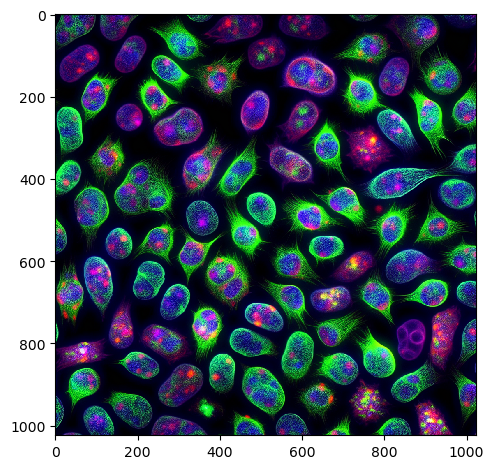

In [3]:
nuclei = prompt_image('an image of 100 nuclei in a fluorescence microscopy image')
imshow(nuclei)

Maybe, generating images of histological slices is more promising.

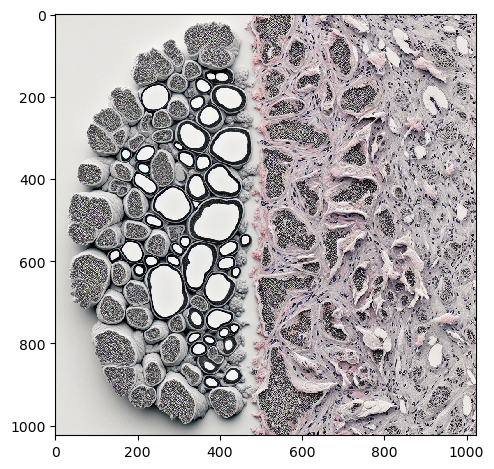

In [4]:
histology = prompt_image('a histology image of lung cancer cells and some healthy tissue')
imshow(histology)

In some cases, Dall-E 2 produces more realistic output.

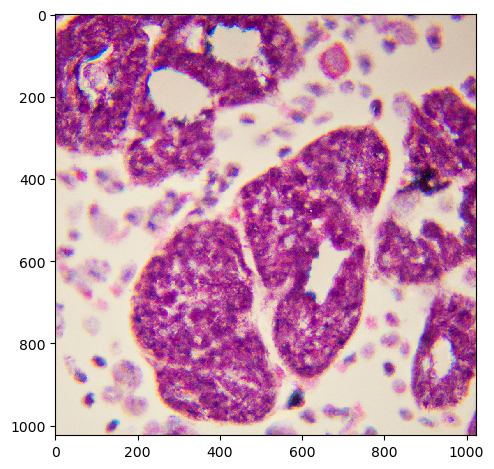

In [5]:
histology = prompt_image('a histology image of lung cancer cells and some healthy tissue',
                        model='dall-e-2')
imshow(histology)

## Exercise
Try to generate realistically looking electron microscopy images. Try Dall-E 2 and 3. How about fluorescence microscopy images? How about CT and MRI?